In [2]:
## Titanic Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
#titanicTrain
pd_version = pd.__version__
np_version = np.__version__

print("Numpy Version:{panda}".format(panda =pd_version ))
print("Pandas Version:{numpy}".format(numpy =np_version ))


Numpy Version:0.24.2
Pandas Version:1.16.2


In [12]:
dataFrame = pd.read_csv('data/titanicTrain.csv')
dataFrame.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [13]:
dataFrame.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Field Description:
Which passenger class has the maximum number of survivors? 
What is the distribution, based on gender, of the survivors among the  different classes? 
What is the distribution of the nonsurvivors among classes that have relatives aboard the ship
.What is the survival percentage among different age groups?

In [11]:
dataFrame['Pclass'].isnull().value_counts() 

False    891
Name: Pclass, dtype: int64

In [14]:
dataFrame['Survived'].isnull().value_counts() 

False    891
Name: Survived, dtype: int64

In [26]:
# #Passengers survived in each class
survivors = dataFrame.groupby('Pclass')['Survived'].sum()  # or 
#survivors = dataFrame.groupby('Pclass')['Survived'].agg(sum )
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [29]:
##Total Passengers in each class
total_passenger = dataFrame.groupby('Pclass')['Survived'].count()
total_passenger

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [31]:
survivor_percentage  = survivors/ total_passenger * 100
survivor_percentage

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

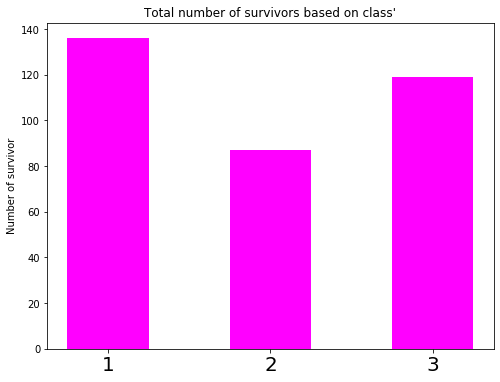

In [37]:
# #Plotting the Total number of survivors 

fg, ax = plt.subplots(1,1, figsize = (8,6))
ax.bar(survivor_percentage.index.values.tolist(),survivors, color = 'magenta', width = 0.5)
ax.set_ylabel("Number of survivor")
ax.set_ylabel("Number of survivor")
ax.set_title("Total number of survivors based on class'")
ax.set_xticks(survivors.index.values.tolist())

xTickMarks = survivors.index.values.tolist() 
xtickNames = ax.set_xticklabels(xTickMarks) 
plt.setp(xtickNames, fontsize=20)
plt.show()


## What is the distribution of survivors based on gender among the various classes?
To answer this question, we'll use the following code to plot a side-by-side bar chart to compare the survival rate and percentage among men and women with respect to the class they were in.


In [39]:
# #Checking for any null values 
dataFrame.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [44]:
dataFrame['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [46]:
# Male Passengers survived in each class 

In [51]:
male_survivors = dataFrame[dataFrame['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [52]:
 #Total Male Passengers in each class 
male_total_passengers = dataFrame[dataFrame['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_total_passengers

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [58]:
 # Female Passengers survived in each class 
female_survivors = dataFrame[dataFrame['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [59]:
#Total Female Passengers in each class 
female_total_passengers = dataFrame[dataFrame['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_total_passengers

Pclass
1     94
2     76
3    144
Name: PassengerId, dtype: int64

In [63]:
sm = dataFrame[dataFrame['Survived'] == 1].sum()
sm

PassengerId                                               151974
Survived                                                     342
Pclass                                                       667
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex            femalefemalefemalefemalefemalefemalefemalefema...
Age                                                      8219.67
SibSp                                                        162
Parch                                                        159
Ticket         PC 17599STON/O2. 3101282113803347742237736PP 9...
Fare                                                     16551.2
dtype: object

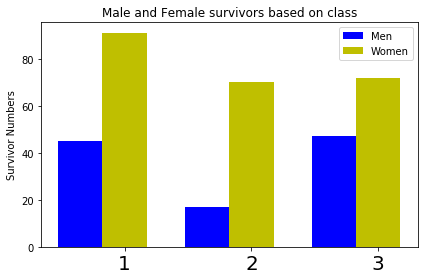

In [60]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
index = np.arange(male_survivors.count()) 
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men') 
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers') 
ax.set_title('Male and Female survivors based on class') 

xTickMarks = male_survivors.index.values.tolist() 
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20) 
plt.legend() 
plt.tight_layout()
plt.show()

# What is the distribution of nonsurvivors among the various classes who have family aboard the ship? 
To answer this question, we'll use the following code to plot bar charts again using the total number of nonsurvivors in each class who each had family aboard, and the percentage with respect to the total number of passengers:


In [64]:
# #Checking for any null values 
dataFrame.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [65]:
# #Checking for the null values
dataFrame['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [66]:
dataFrame['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [69]:
#Total number of non-survivors in each class
non_survivors = dataFrame[(dataFrame['SibSp'] > 0) | (dataFrame['Parch'] > 0) &  (dataFrame['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [72]:
#Total passengers in each class
total_passengers = dataFrame.groupby('Pclass')['PassengerId'].count()
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [75]:
non_survivor_percentage = non_survivors / total_passengers 
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

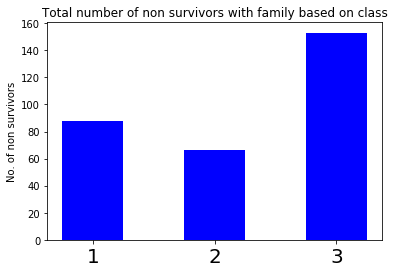

In [76]:
 #Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)   
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors,color='blue', width=0.5) 
ax.set_ylabel('No. of non survivors') 
ax.set_title('Total number of non survivors with family based on class') 
xTickMarks = non_survivors.index.values.tolist() 
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks) 
plt.setp(xtickNames, fontsize=20) 
plt.show()

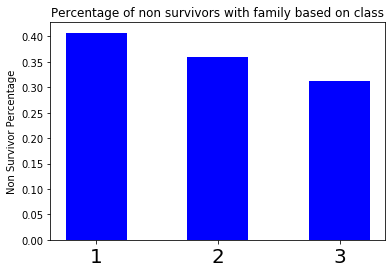

In [77]:
# #Plot of percentage of non survivors with family based on class 
fig = plt.figure() 
ax = fig.add_subplot(111) 
rect = ax.bar(non_survivor_percentage.index.values.tolist(),non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class') 
xTickMarks = non_survivor_percentage.index.values.tolist() 
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks) 
plt.setp(xtickNames, fontsize=20) 
plt.show()
